In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, r2_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import dataset
df=pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df1=df.copy()

In [5]:
# Data Exploration and preprocessing
# no of columns
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# to check shape of data
df1.shape

(6362620, 11)

In [7]:
# To check dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# to check missing value
df1.isna().sum()                 #There is no missing value in this dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df1["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: >

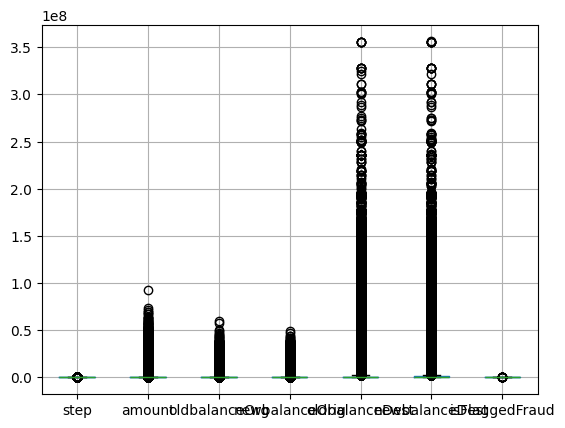

In [11]:
# to check outliers
df_outliers = df.select_dtypes(include="number")
df_outliers[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','isFlaggedFraud']].boxplot()

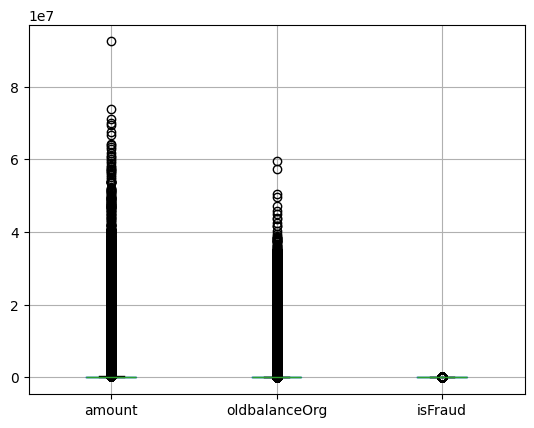

In [13]:
# to check  outliers
df_outliers[['amount','oldbalanceOrg','isFraud']].boxplot()
plt.show()

In [14]:
# to check duplicated value
df1[df1.duplicated()]    #there is no duplictaed value in data.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


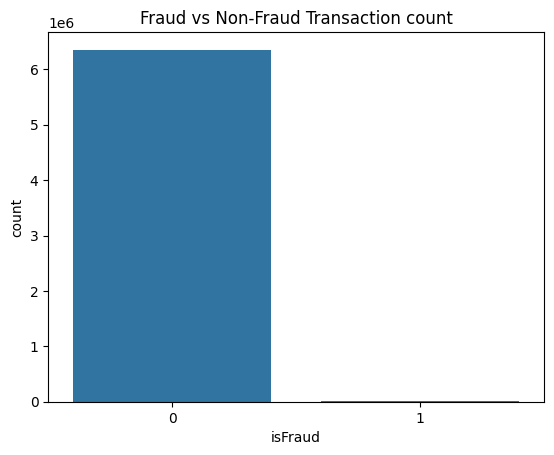

In [15]:
sns.countplot(x="isFraud",data=df)
plt.title("Fraud vs Non-Fraud Transaction count")
plt.show()

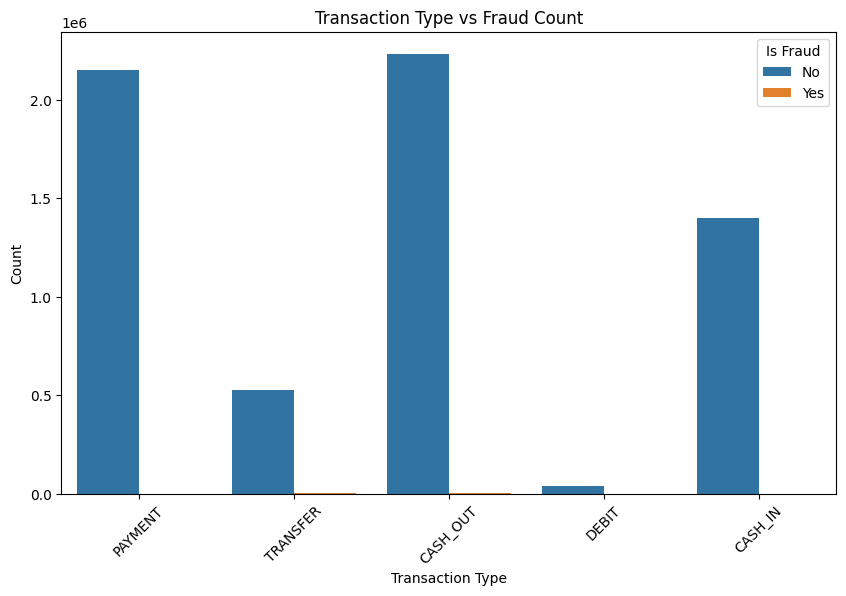

In [16]:

plt.figure(figsize=(10,6))
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Transaction Type vs Fraud Count")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title="Is Fraud", labels=["No", "Yes"])
plt.xticks(rotation=45)  # If type names are long
plt.show()

In [17]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [19]:
# Feature Enginerring
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df1["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [27]:
df2=df1.drop(["step","nameOrig","nameDest","oldbalanceDest","newbalanceDest","isFlaggedFraud"],axis=1)
df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0
1,PAYMENT,1864.28,21249.0,19384.72,0
2,TRANSFER,181.00,181.0,0.00,1
3,CASH_OUT,181.00,181.0,0.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0


In [33]:
df2["type"].replace({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5},inplace=True)
df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,2,9839.64,170136.0,160296.36,0
1,2,1864.28,21249.0,19384.72,0
2,4,181.00,181.0,0.00,1
3,1,181.00,181.0,0.00,1
4,2,11668.14,41554.0,29885.86,0


In [37]:
# Train test split
x=np.array(df2[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y=np.array(df2[["isFraud"]])
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state = 42,stratify=y,test_size=0.2)

##### Decision Tree Model

In [49]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


###### Training and Testing 

In [50]:
print("************On Testing data***************")
y_pred=model.predict(x_test)
accuracy_sc=accuracy_score(y_test,y_pred)
print("Accuracy Score is",accuracy_sc)
clf_report=classification_report(y_test,y_pred)
print("Classification report is\n",clf_report)
print("************On Training data***************")
y_pred=model.predict(x_train)
accuracy_sc=accuracy_score(y_train,y_pred)
print("Accuracy Score is",accuracy_sc)
clf_report=classification_report(y_train,y_pred)
print("Classification report is\n",clf_report)

************On Testing data***************
Accuracy Score is 0.9997131684746221
Classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.89      0.88      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

************On Training data***************
Accuracy Score is 0.9999998035400511
Classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       1.00      1.00      1.00      6570

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096



In [ ]:
feature_names = ["type", "amount", "oldbalanceOrg","newbalanceOrig","isFraud"]  
plot_tree(model, feature_names=feature_names, class_names=["0", "1"], filled=True)
plt.savefig("DTT_raw.png")

In [51]:
import pickle
with open("static/model.pkl","wb")as file:
    pickle.dump(model,file)

In [52]:
with open("static/model.pkl","rb")as file:
    model=pickle.load(file)
    

In [54]:
with open("static/dt_clf.pkl", "rb") as file:
    model = pickle.load(file)

In [55]:
y_pred=model.predict([[4,181.00,181.0,0]])
print(y_pred)

[1]


In [56]:
y_pred=model.predict([[2,9839.64,170136.0,160296.36]])
print(y_pred)

[0]
